# Pairwise Query Similarity with Jaccard Similarity

The aim of this experiment is to find similar descriptions from the pool of descriptions present to the given input. This can be achieved in many ways and the main four ways experimented here are: 

        - Calculating Jaccard Similarity between entity classes. 
        - Using Word2Vec embeddings and Cosine similarity between descriptions 
        - Using sentence transformers for the caluclation of similarities. 

- This notebook in particular deals with <b>Jaccard Similarity Analysis</b> 

- It also contains the description about how many top 3 similar queries have the same decade and author. <b>(Task for the DSTrack)</b>

- There is also a runtime measurement that has been done with respect to these queries. 







Importing Libraries necessary

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import pickle 
import time
import seaborn as sns


### The Dataset

The Different Attributes in the dataset are: 
- id : text 
- Artist : text 
- Album : text 
- Decade : text 
- Sales_total : number 
- Sales_US : number
- <b>Description : Text</b>

In [2]:
dataset = pd.read_csv('../data/preprocessed.csv') 
dataset.head(3)


,id,artist,album,decade,sales_total,sales_us,description,author
0,25-the-beatles-sgt-pepper-s-lonely-hearts-club...,The Beatles,Sgt. Pepper’s Lonely Hearts Club Band,60s,1800000,1100000,decade defined sweeping cultural paradigm shif...,Max Blau
1,24-pink-floyd-the-wall,Pink Floyd,The Wall,70s,1800000,1100000,legacy pink floyd cemented dark side moon . wa...,Clint Alwahab
2,23-michael-jackson-bad,Michael Jackson,Bad,80s,1900000,1000000,bizarre consider album five consecutive number...,Josh Jackson


### Importing the pickled File with the Entity Classes

In [3]:
with open('../data/entity_dictionary.pickle', 'rb') as handle:
    entity_dictionary = pickle.load(handle)

### Extracting Entity_classes, Entity Mentions and descriptions from Entity Description

Since the similarity methods require each one of these attributes, entity classes, entity mentions and the description are going to be extracted. 




In [142]:
'''
Getting the descriptions, entity_classes for various descriptions. 
'''
description, entity_class = [],[]
for key in entity_dictionary:
    description.append(key)
    entity_class_value = []
    for vals in entity_dictionary[key]: 
        entity_class_value.append(vals[1])
    entity_class.append(entity_class_value)


### Jaccard Similarity Calculation 


Jaccard Similarity is defined as a fraction of number of common elements between two sets over the total number of elements present in both the sets, and this gives an idea over the sense of similarity between two sets. 

Jaccard Similarity = (intersection between two sets) / (union of two sets)

Range of Value for Jaccard Similarity : 0 to 1.

Here, the entity classes between descriptions are going to be taken into consideration while calculating the Jaccard similarity. 


In [143]:
def jaccard_similarity(x, y): 
    '''
    Function for calculating the Jaccard Similarity between two sets 
    '''
    if len(x) <=0 or len(y) <=0: 
        return -1
    x, y = set(x), set(y)
    jaccard_similarity_score =round(float(len(x.intersection(y))/len(y.union(x))),2)

    return jaccard_similarity_score

def get_entity_class(query):
    '''
    Function that gets the entity class for the given query 
    '''
    doc = nlp(query)
    entity_class = [] 
    if doc.ents:
        for entity in doc.ents:
            entity_class.append(entity.label_)

    return entity_class

def jaccard_similarity_calculator(query):
    '''
    Function that takes in one query
    * Calculates the entity classes using spacy 
    * Compares that with the entity class of the different entity classes present. 
    
    Returns Array with Jaccard similarity values along with the query index 
    '''
    
    query_entity_class = get_entity_class(query)
    jaccard_similarity_scores = []
    #Comparing query with every description's entity class 
    for i in range(1, len(description)+1): 
        jaccard_similarity_scores.append((jaccard_similarity(query_entity_class, entity_class[i-1]), i-1))

    return jaccard_similarity_scores
    
    

In [144]:
'''
Calculating the Jaccard Similarity for all the descriptions. 
Time Taken for the comparisons and calculation of similarity is measured too. 
'''

#Jaccard Value Matrix contains the Jaccard Values with every description compared against each other. 
start = time.time()
jaccard_value_matrix = []
for i in range(len(description)):
    jaccard_value_matrix.append(jaccard_similarity_calculator(description[i]))
end = time.time()

print("Runtime Value for Jaccard Similarity Comparisons: ", round(end-start, 3), ' seconds')
    


Runtime Value for Jaccard Similarity Comparisons:  0.294  seconds


This is how the Jaccard Similarity Matrix Looks like. 

In [145]:
dataframe = pd.DataFrame(jaccard_value_matrix)
dataframe.head(3) 

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,"(1.0, 0)","(0.0, 1)","(0.5, 2)","(0.33, 3)","(0.33, 4)","(0.33, 5)","(0.33, 6)","(0.5, 7)","(0.25, 8)","(0.5, 9)",...,"(0.2, 15)","(1.0, 16)","(0.5, 17)","(0.33, 18)","(0.5, 19)","(0.0, 20)","(0.5, 21)","(0.2, 22)","(0.33, 23)","(0.5, 24)"
1,"(0.0, 0)","(1.0, 1)","(0.25, 2)","(0.5, 3)","(0.5, 4)","(0.0, 5)","(0.0, 6)","(0.25, 7)","(0.0, 8)","(0.0, 9)",...,"(0.25, 15)","(0.0, 16)","(0.25, 17)","(0.5, 18)","(0.25, 19)","(1.0, 20)","(0.0, 21)","(0.25, 22)","(0.5, 23)","(0.0, 24)"
2,"(0.5, 0)","(0.25, 1)","(1.0, 2)","(0.5, 3)","(0.5, 4)","(0.2, 5)","(0.2, 6)","(0.6, 7)","(0.4, 8)","(0.25, 9)",...,"(0.33, 15)","(0.5, 16)","(0.6, 17)","(0.5, 18)","(1.0, 19)","(0.25, 20)","(0.25, 21)","(0.6, 22)","(0.5, 23)","(0.25, 24)"


### Analyzing authors and decades

Analyzing authors and decade information for the top 3 most similar queries for every description value to calculate a percentage of queries that have this property. 

In [146]:
def get_top_3(jaccard_value_list):
    '''
    Takes in the jaccard value list
    Returns the index of the top 3 similar queries
    '''
    jaccard_value_list = sorted(jaccard_value_list)
    jaccard_value_list = jaccard_value_list[len(jaccard_value_list)-3:]
    indices = [ value[1] for value in jaccard_value_list]
    return indices

def check_similar_authors(similar_query_indices):
    '''
    Takes the indices of the top 3 similar queries
    Returns the percentage of similar authors
    '''

    if dataset.iloc[similar_query_indices[0]].author == dataset.iloc[similar_query_indices[1]].author == dataset.iloc[similar_query_indices[2]].author:
        return 3/3 
    if dataset.iloc[similar_query_indices[1]].author == dataset.iloc[similar_query_indices[2]].author or dataset.iloc[similar_query_indices[2]].author == dataset.iloc[similar_query_indices[0]].author or dataset.iloc[similar_query_indices[1]].author == dataset.iloc[similar_query_indices[0]].author:
        return 2/3
    return 0/3
    
def check_similar_decade(similar_query_indices):
    '''
    Takes the indices of the top 3 similar queries 
    Returns the percentage of similar decades
    '''
  
    
    if dataset.iloc[similar_query_indices[0]].decade == dataset.iloc[similar_query_indices[1]].decade == dataset.iloc[similar_query_indices[2]].decade:
        return 3/3
    if dataset.iloc[similar_query_indices[1]].decade == dataset.iloc[similar_query_indices[2]].decade or dataset.iloc[similar_query_indices[2]].decade == dataset.iloc[similar_query_indices[0]].decade or dataset.iloc[similar_query_indices[0]].decade == dataset.iloc[similar_query_indices[1]].decade:
        return 2/3
  
    
    return 0/3


In [147]:
#Getting the top 3 most similar queries for each description.  
get_top_3_indices = [get_top_3(jaccard_value_matrix[i]) for i in range(len(jaccard_value_matrix))] 

#Getting the percentage of same authors  in the top 3 most similar albums (based on description)
same_author_percentage = [check_similar_authors(index) for index in get_top_3_indices]

#Getting the percentage of same decade for top 3 most similar album (based on description)
same_decade_percentage = [check_similar_decade(index) for index in get_top_3_indices]

 

### Visualization of Results of percentage of same decades and authors within top 3 most similar queries

##### Histogram to understand the distribution of queries that had 1author similar in the top 3 queries, 2 authors similar in the top 3 queries 

Text(0, 0.5, 'Frequency')

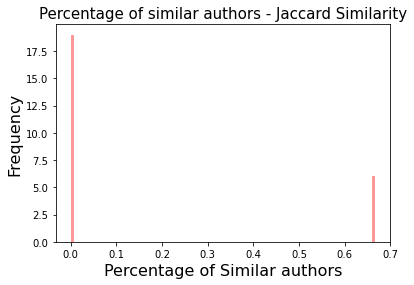

In [153]:

hplot = sns.distplot(same_author_percentage, kde=False, color='red', bins=100)
plt.title('Percentage of similar authors - Jaccard Similarity', fontsize=15)
plt.xlabel('Percentage of Similar authors', fontsize=16)
plt.ylabel('Frequency' , fontsize=16)


> Conclusion: 
- around 18 queries do not have any of the authors being the same between the top 3 most similar queries 
- around 7 queries have 2 of the 3 top most similar queries sharing the same author between them

##### Histogram to understand the distribution of queries that had 1 decade similar in the top 3 queries, 2 decades similar in the top 3 queries 

Text(0, 0.5, 'Frequency')

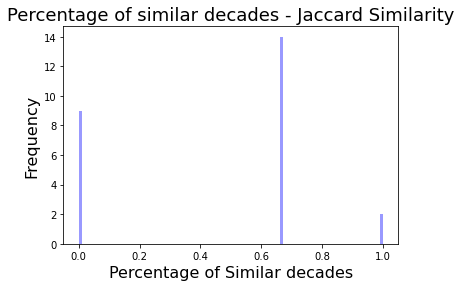

In [155]:
hplot = sns.distplot(same_decade_percentage, kde=False, color='blue', bins=100)
plt.title('Percentage of similar decades - Jaccard Similarity', fontsize=18)
plt.xlabel('Percentage of Similar decades', fontsize=16)
plt.ylabel('Frequency' , fontsize=16)

> From the above histogram, it can be observed that 
- around 9 albums, do not have any similarity in decades in their top 3 most similar albums. 
- 14 albums have two of the 3 top most similar queries having the same decades. 
- 2  albums have all the top 3 most similar queries having the same decade. 
